Root Mean Squared Error for Cycle 1: 0.18954743806037017


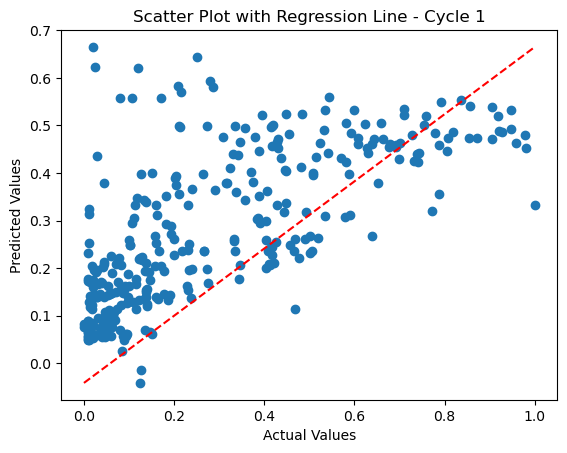

Root Mean Squared Error for Cycle 2: 0.19934554494420031


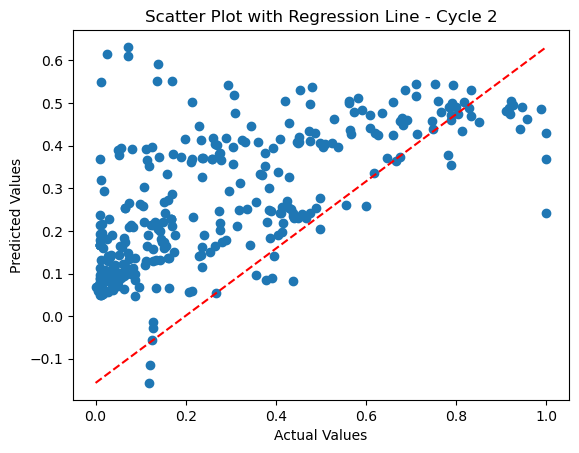

Root Mean Squared Error for Cycle 3: 0.1944491167643218


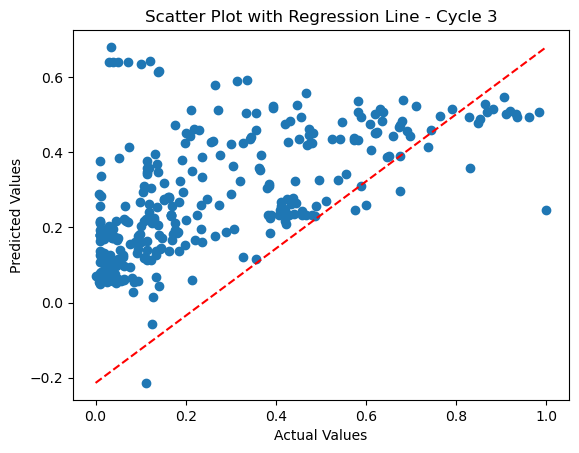

Root Mean Squared Error for Cycle 4: 0.21092431356217756


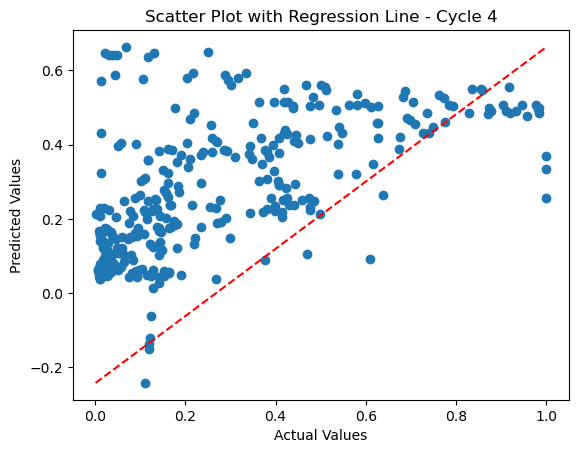

Root Mean Squared Error for Cycle 5: 0.20767313136844526


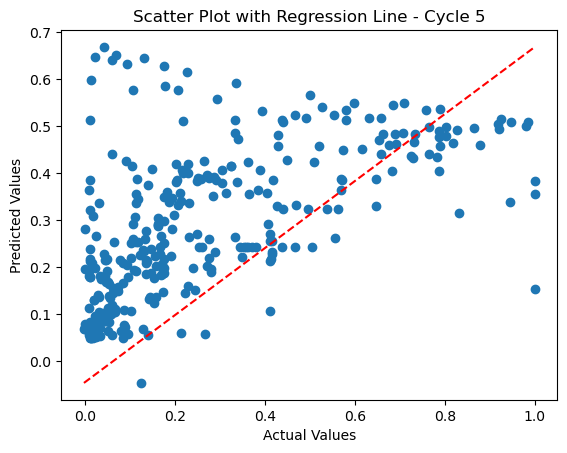

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']

# Assume 'target_column' is the name of your target variable
X = data[features]  # Features
ylin = data['Tot Vol Frac Other']

# Set the number of cycles through all data for testing
num_cycles = 6  # Adjust this number as needed

# Initialize the logistic regression model
linreg = LinearRegression()

# Loop for multiple linear regressions with different test sets
for cycle in range(num_cycles):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, ylin, test_size=0.2, random_state=cycle)
    
    # Fit the model using the training data
    linreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = linreg.predict(X_test)

    # Calculate and print Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error for Cycle {cycle + 1}: {rmse}")

    # Scatter Plot with Regression Line
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot with Regression Line - Cycle {cycle + 1}')
    plt.show()

RMSE for Cycle 1: 0.19
RMSE for Cycle 2: 0.199
RMSE for Cycle 3: 0.194
RMSE for Cycle 4: 0.211
RMSE for Cycle 5: 0.208
RMSE for Cycle 6: 0.191


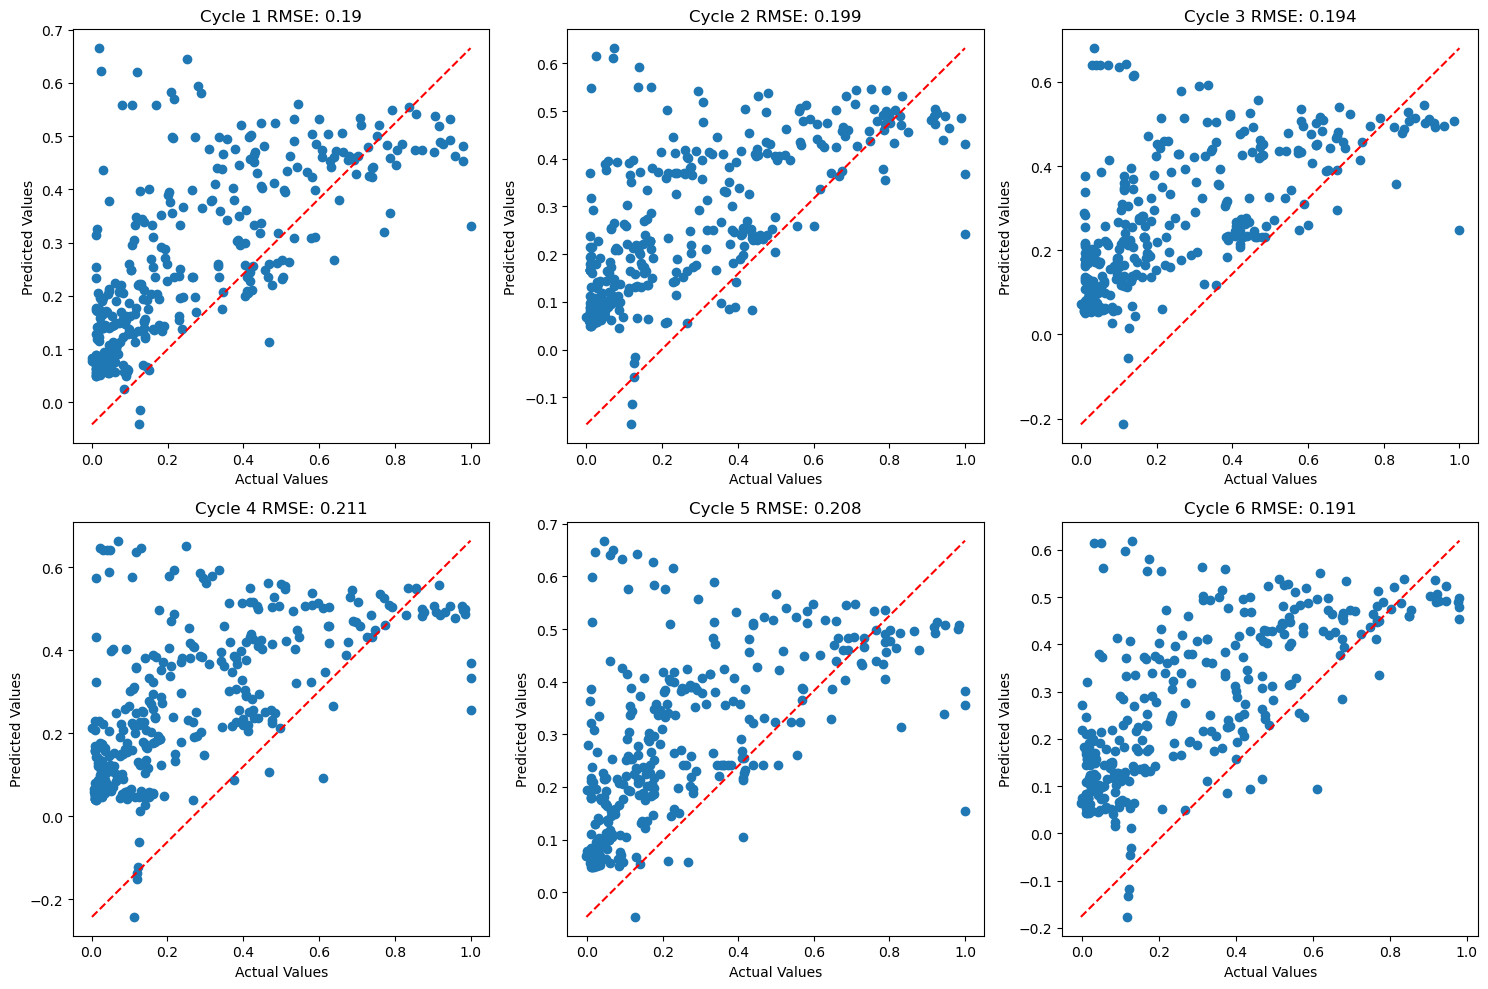

In [12]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
features = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']

# Assume 'target_column' is the name of your target variable
X = data[features]  # Features
ylin = data['Tot Vol Frac Other']

# Set the number of cycles through all data for testing
num_cycles = 6  # Adjust this number as needed

# Calculate the optimal number of rows and columns for the subplots
num_plots = num_cycles
rows = int(np.sqrt(num_plots))
cols = int(np.ceil(num_plots / rows))

# Create a figure with the optimal layout
fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

# Loop for multiple linear regressions with different test sets
for cycle in range(num_cycles):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, ylin, test_size=0.2, random_state=cycle)
    
    # Initialize the logistic regression model
    linreg = LinearRegression()

    # Fit the model using the training data
    linreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = linreg.predict(X_test)

    # Calculate and print Root Mean Squared Error
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
    print(f"RMSE for Cycle {cycle + 1}: {rmse}")

    # Scatter Plot with Regression Line
    ax = axs[int(cycle / cols), cycle % cols]
    ax.scatter(y_test, y_pred)
    ax.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'Cycle {cycle + 1} RMSE: {rmse}')

# Hide any empty subplots
for i in range(num_plots, rows * cols):
    axs[int(i / cols), i % cols].axis('off')

plt.tight_layout()
plt.show()


Root Mean Squared Error for Fold 1: 0.2227643076414376


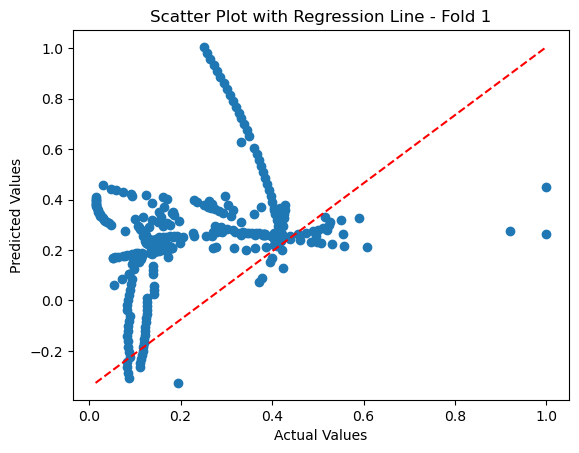

Root Mean Squared Error for Fold 2: 0.21614972733986015


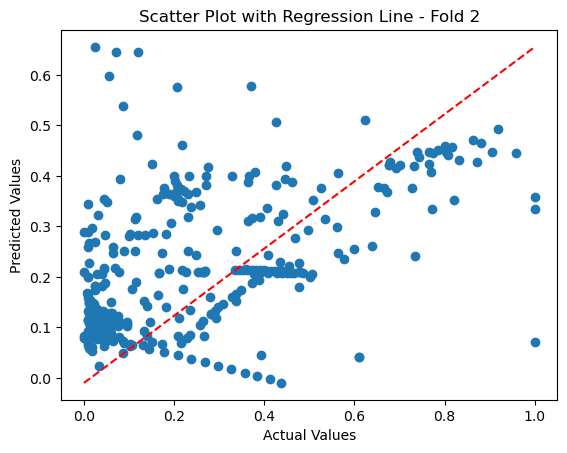

Root Mean Squared Error for Fold 3: 0.24193927855698683


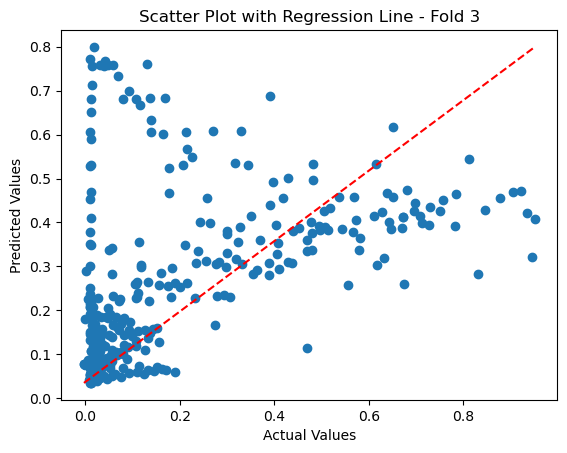

Root Mean Squared Error for Fold 4: 0.20833532515031863


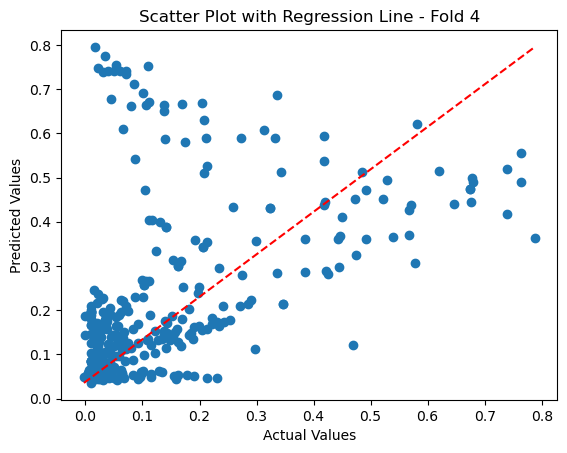

Root Mean Squared Error for Fold 5: 0.42994911373225136


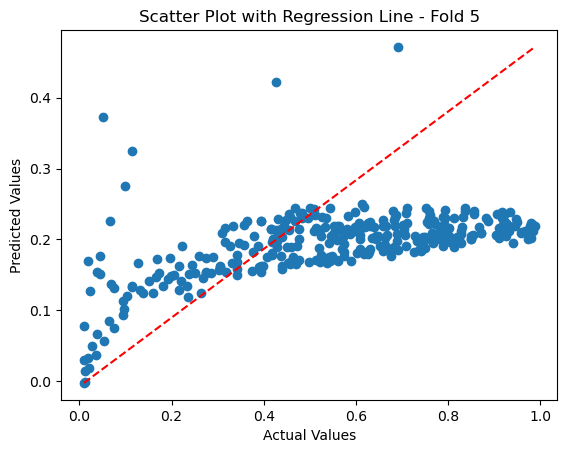

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the logistic regression model
linreg = LinearRegression()

# Initialize KFold with the desired number of splits
kf = KFold(n_splits=5)

# Iterate over the K folds
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = ylin.iloc[train_index], ylin.iloc[test_index]

    # Fit the model using the training data
    linreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = linreg.predict(X_test)

    # Calculate and print Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error for Fold {fold}: {rmse}")

    # Scatter Plot with Regression Line
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatter Plot with Regression Line - Fold {fold}')
    plt.show()


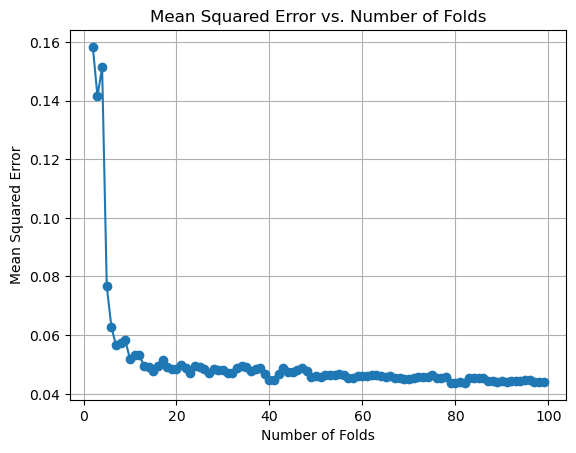

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the logistic regression model
linreg = LinearRegression()

# Define a range of fold numbers to test
fold_range = range(2, 100)  # Test 2 to 10 folds

# Initialize lists to store mean squared errors for each fold
mean_squared_errors = []

for num_splits in fold_range:
    kf = KFold(n_splits=num_splits)
    mse_per_fold = []

    for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = ylin.iloc[train_index], ylin.iloc[test_index]

        # Fit the model using the training data
        linreg.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = linreg.predict(X_test)

        # Calculate and store mean squared error for this fold
        mse = mean_squared_error(y_test, y_pred)
        mse_per_fold.append(mse)

    # Calculate the mean mean squared error for this number of folds
    mean_mse = np.mean(mse_per_fold)
    mean_squared_errors.append(mean_mse)

# Plot the mean squared errors for each fold
plt.plot(fold_range, mean_squared_errors, marker='o')
plt.xlabel('Number of Folds')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Number of Folds')
plt.grid(True)
plt.show()


Root Mean Squared Error for Fold 1: 0.2060715981636026
Root Mean Squared Error for Fold 2: 0.23230071528152102
Root Mean Squared Error for Fold 3: 0.20731612319889997
Root Mean Squared Error for Fold 4: 0.2239122386511961
Root Mean Squared Error for Fold 5: 0.2513204447524279
Root Mean Squared Error for Fold 6: 0.20233943367205928
Root Mean Squared Error for Fold 7: 0.20898032347228532
Root Mean Squared Error for Fold 8: 0.18526753541869778
Root Mean Squared Error for Fold 9: 0.28431267954448824
Root Mean Squared Error for Fold 10: 0.25586752699102305


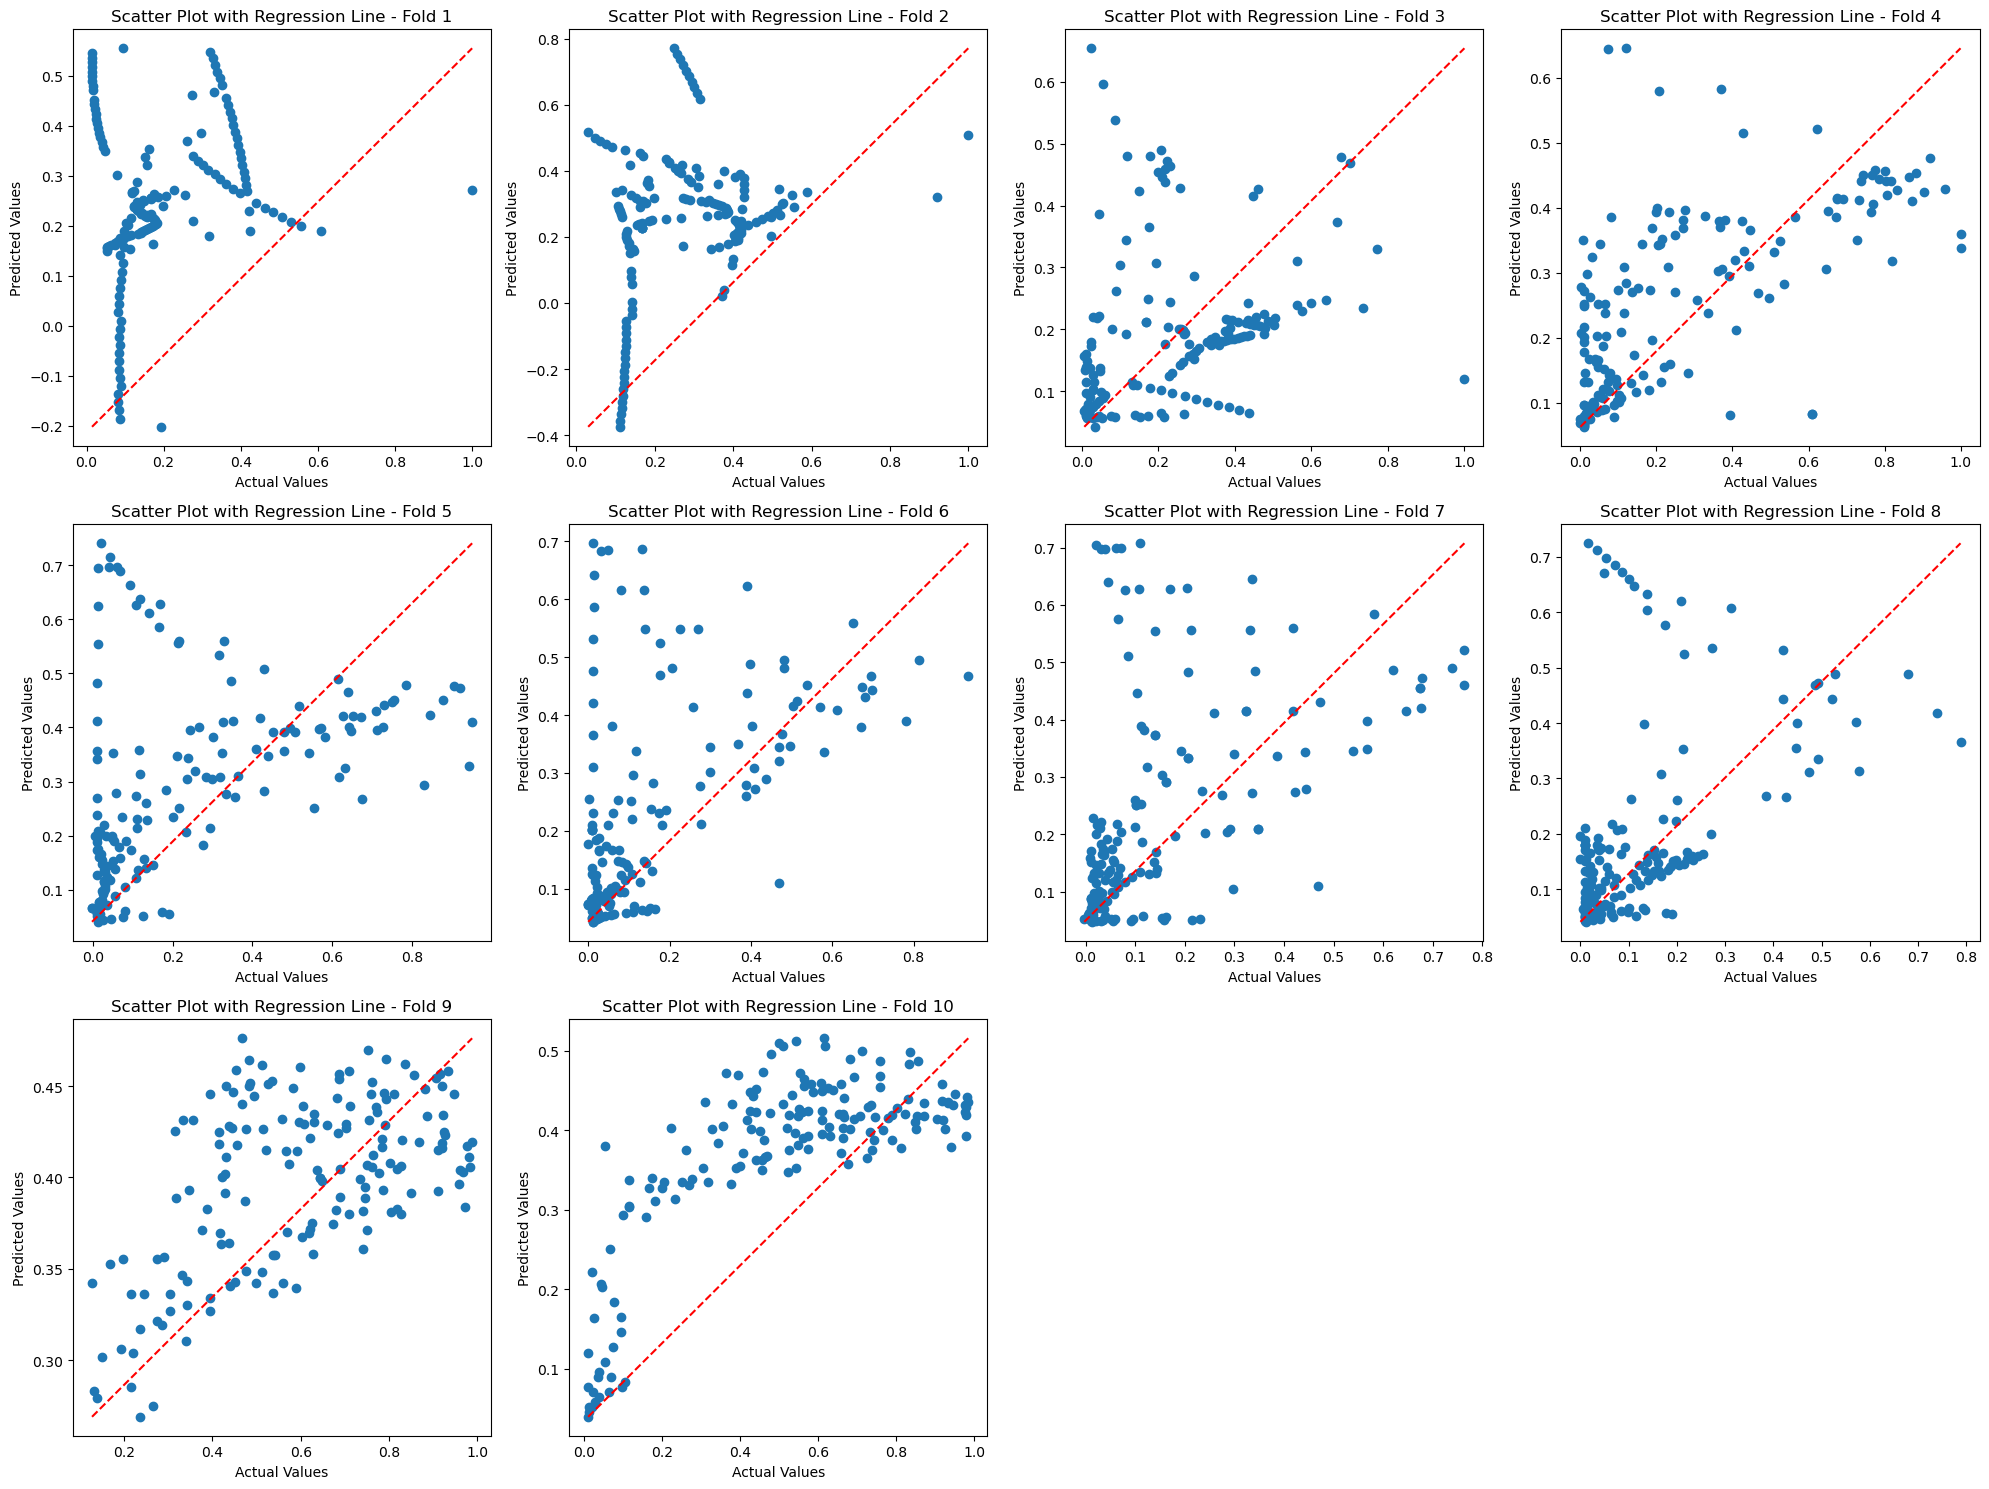

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the logistic regression model
linreg = LinearRegression()

# Define the desired number of splits (folds)
num_splits = 10  # Adjust this number as needed

# Initialize KFold with the desired number of splits
kf = KFold(n_splits=num_splits)

# Calculate the optimal number of rows and columns for the subplots
num_plots = kf.get_n_splits()
rows = int(np.sqrt(num_plots))
cols = int(ceil(num_plots / rows))

# Create a figure with the optimal layout
fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

# Iterate over the K folds and plot on the corresponding subplot
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = ylin.iloc[train_index], ylin.iloc[test_index]

    # Fit the model using the training data
    linreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = linreg.predict(X_test)

    # Calculate and print Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error for Fold {fold}: {rmse}")

    # Scatter Plot with Regression Line
    ax = axs[int((fold - 1) / cols), (fold - 1) % cols]
    ax.scatter(y_test, y_pred)
    ax.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'Scatter Plot with Regression Line - Fold {fold}')

# Hide any empty subplots
for i in range(num_plots, rows * cols):
    axs[int(i / cols), i % cols].axis('off')

plt.tight_layout()
plt.show()


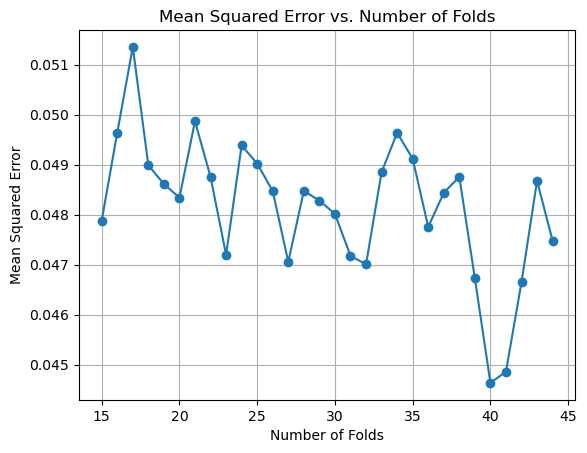

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the logistic regression model
linreg = LinearRegression()

# Define a range of fold numbers to test
fold_range = range(15, 45)  # Test 2 to 10 folds

# Initialize lists to store mean squared errors for each fold
mean_squared_errors = []

for num_splits in fold_range:
    kf = KFold(n_splits=num_splits)
    mse_per_fold = []

    for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = ylin.iloc[train_index], ylin.iloc[test_index]

        # Fit the model using the training data
        linreg.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = linreg.predict(X_test)

        # Calculate and store mean squared error for this fold
        mse = mean_squared_error(y_test, y_pred)
        mse_per_fold.append(mse)

    # Calculate the mean mean squared error for this number of folds
    mean_mse = np.mean(mse_per_fold)
    mean_squared_errors.append(mean_mse)

# Plot the mean squared errors for each fold
plt.plot(fold_range, mean_squared_errors, marker='o')
plt.xlabel('Number of Folds')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Number of Folds')
plt.grid(True)
plt.show()


Root Mean Squared Error for Fold 1: 0.12521913943249108
Root Mean Squared Error for Fold 2: 0.25909000226522094
Root Mean Squared Error for Fold 3: 0.18229740663087543
Root Mean Squared Error for Fold 4: 0.23962152041387572
Root Mean Squared Error for Fold 5: 0.17189445231328596
Root Mean Squared Error for Fold 6: 0.23616174438500942
Root Mean Squared Error for Fold 7: 0.26938540175955716
Root Mean Squared Error for Fold 8: 0.17852556132824077
Root Mean Squared Error for Fold 9: 0.22337284119135437
Root Mean Squared Error for Fold 10: 0.19394049162893656
Root Mean Squared Error for Fold 11: 0.2409940213438542
Root Mean Squared Error for Fold 12: 0.14243459162752803
Root Mean Squared Error for Fold 13: 0.2541050246348289
Root Mean Squared Error for Fold 14: 0.2634607766398687
Root Mean Squared Error for Fold 15: 0.23483808192832578


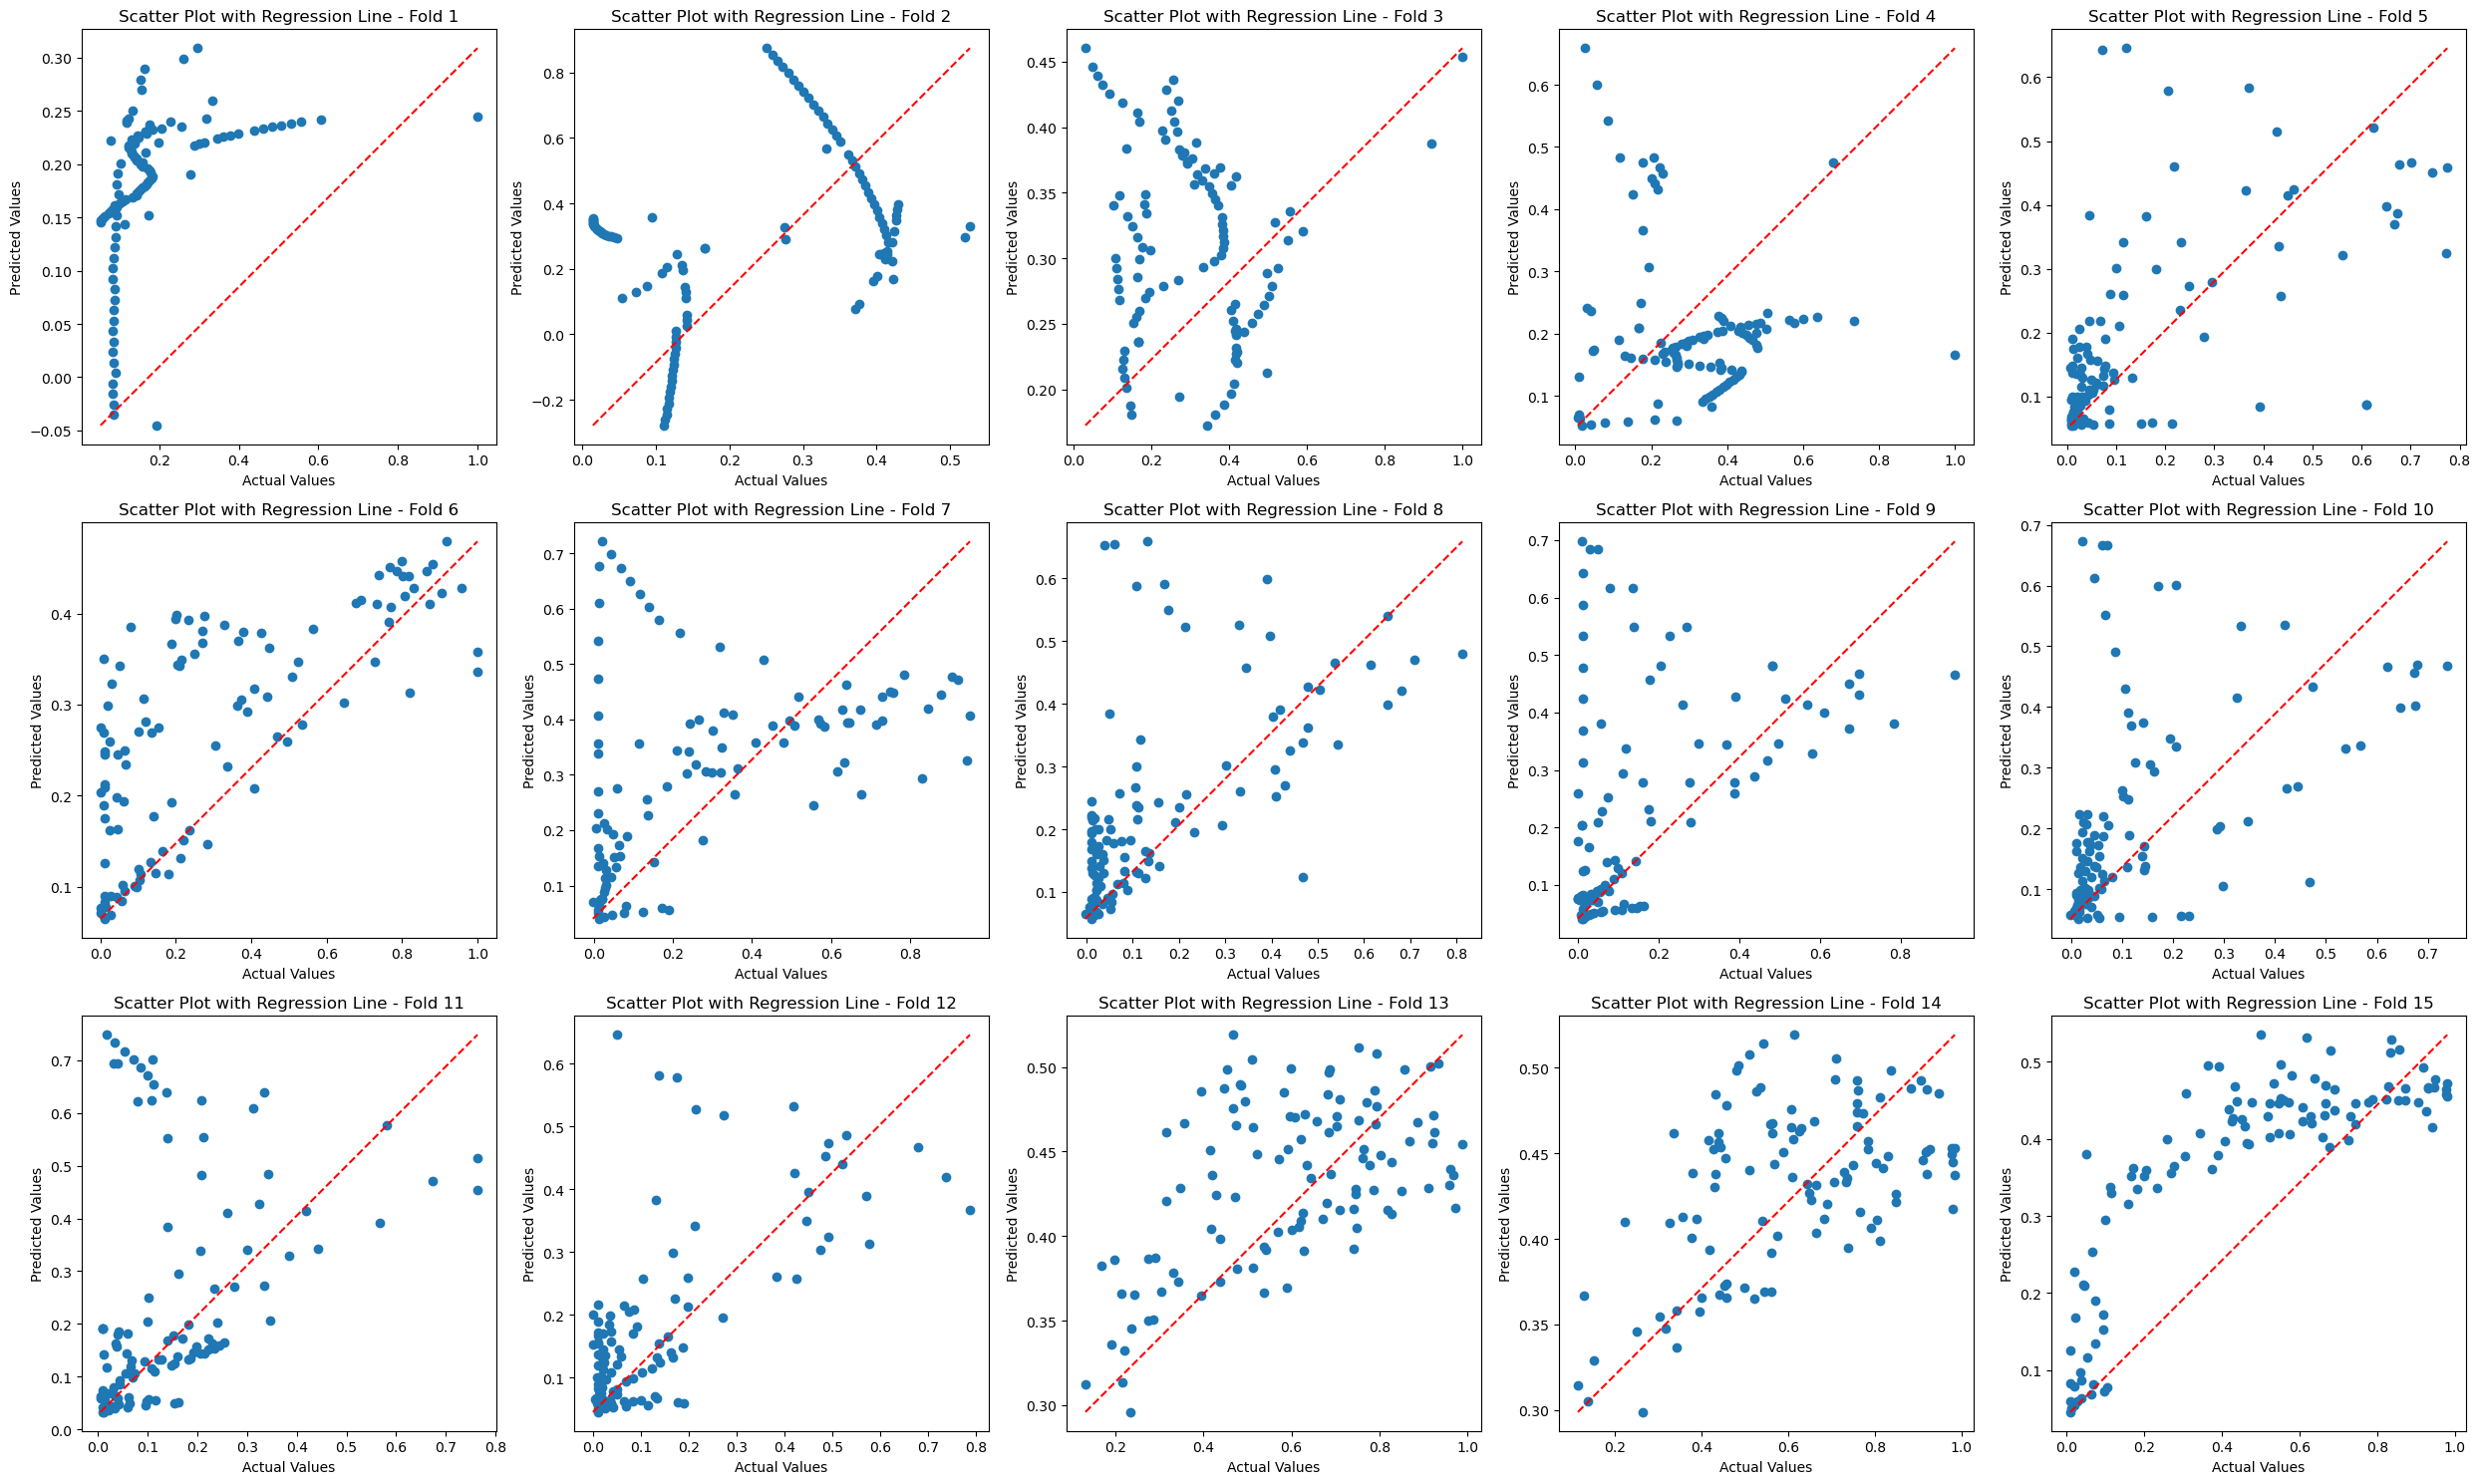

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the logistic regression model
linreg = LinearRegression()

# Define the desired number of splits (folds)
num_splits = 10  # Adjust this number as needed

# Initialize KFold with the desired number of splits
kf = KFold(n_splits=num_splits)

# Calculate the optimal number of rows and columns for the subplots
num_plots = kf.get_n_splits()
rows = int(np.sqrt(num_plots))
cols = int(ceil(num_plots / rows))

# Create a figure with the optimal layout
fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

# Iterate over the K folds and plot on the corresponding subplot
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = ylin.iloc[train_index], ylin.iloc[test_index]

    # Fit the model using the training data
    linreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = linreg.predict(X_test)

    # Calculate and print Root Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error for Fold {fold}: {rmse}")

    # Scatter Plot with Regression Line
    ax = axs[int((fold - 1) / cols), (fold - 1) % cols]
    ax.scatter(y_test, y_pred)
    ax.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'Scatter Plot with Regression Line - Fold {fold}')

# Hide any empty subplots
for i in range(num_plots, rows * cols):
    axs[int(i / cols), i % cols].axis('off')

plt.tight_layout()
plt.show()
